# 教師なし学習
アルゴリズムには入力データだけ与えられ、データから知識を抽出する。
- 教師なし変換
元のデータ表現を変換して、人間や他の機械学習アルゴリズムにとってわかりやすいデータ表現にする。
    - 次元削除
本質的な特徴を抽出する
    - 成分を見つける
-  クラスタリング
グループ分けするアルゴリズム
例.SNSにあげた写真を人物ごとにグループ分けする

## 前処理とスケール変換
ニューラルネットワークやSVMなどのアルゴリズムはデータのスケール変換に敏感

StandardScaler:標準正規分布に従うよう変換

RobustScaler:四分位数を用いて外れ値を無視する

MinMaxScaler：データが0~1に入るように変換,minで引いてrangeで割る

Normalizer:ユークリッド長1に入るように変換（半径1の円）

In [2]:
from preamble import *
plt.rcParams['image.cmap'] = 'gray'

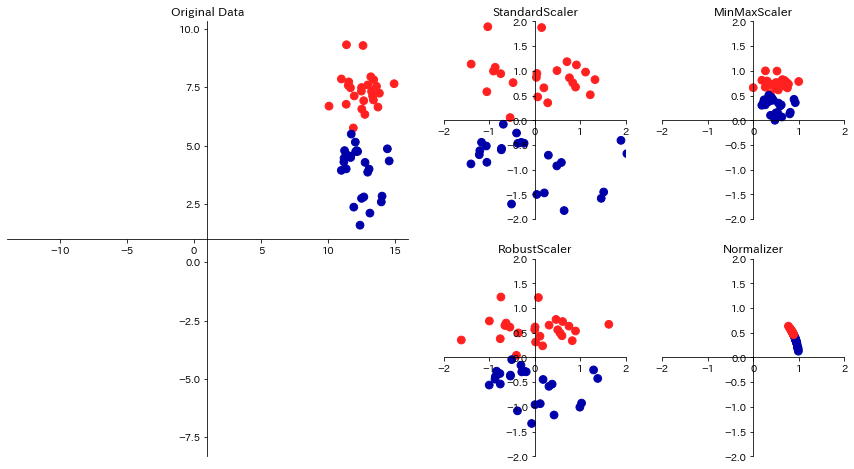

In [3]:
mglearn.plots.plot_scaling()

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=1)
print(X_train.shape)

(426, 30)


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [9]:
scaler.fit(X_train)

MinMaxScaler()

In [10]:
X_train_scaled = scaler.transform(X_train)
print(X_train_scaled.shape)
print(X_train.min(axis=0))
print(X_train.max(axis=0))
print(X_train_scaled.min(axis=0))
print(X_train_scaled.max(axis=0))

(426, 30)
[  6.981   9.71   43.79  143.5     0.053   0.019   0.      0.      0.106
   0.05    0.115   0.36    0.757   6.802   0.002   0.002   0.      0.
   0.01    0.001   7.93   12.02   50.41  185.2     0.071   0.027   0.
   0.      0.157   0.055]
[  28.11    39.28   188.5   2501.       0.163    0.287    0.427    0.201
    0.304    0.096    2.873    4.885   21.98   542.2      0.031    0.135
    0.396    0.053    0.061    0.03    36.04    49.54   251.2   4254.
    0.223    0.938    1.17     0.291    0.577    0.149]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [11]:
X_test_scaled = scaler.transform(X_test)

In [12]:
print(X_test_scaled.min(axis=0))
print(X_test_scaled.min(axis=0))


[ 0.034  0.023  0.031  0.011  0.141  0.044  0.     0.     0.154 -0.006
 -0.001  0.006  0.004  0.001  0.039  0.011  0.     0.    -0.032  0.007
  0.027  0.058  0.02   0.009  0.109  0.026  0.     0.    -0.    -0.002]
[ 0.034  0.023  0.031  0.011  0.141  0.044  0.     0.     0.154 -0.006
 -0.001  0.006  0.004  0.001  0.039  0.011  0.     0.    -0.032  0.007
  0.027  0.058  0.02   0.009  0.109  0.026  0.     0.    -0.    -0.002]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

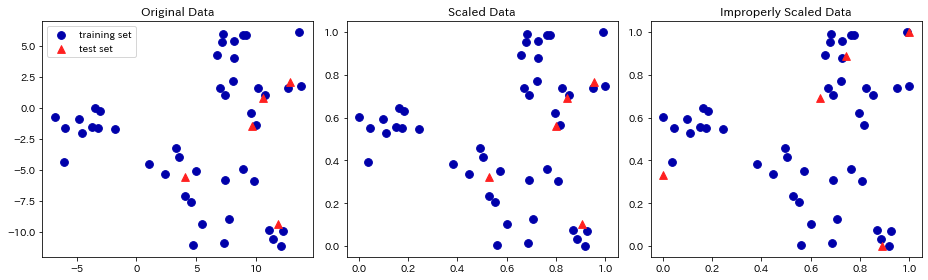

In [14]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=50,centers=5,random_state=4,cluster_std=2)
X_train,X_test = train_test_split(X,random_state=5,test_size=.1)
fig,axes = plt.subplots(1,3,figsize=(13,4))
axes[0].scatter(X_train[:,0],X_train[:,1],c=mglearn.cm2(0),label="training set",s=60)
axes[0].scatter(X_test[:,0],X_test[:,1],marker="^",c=mglearn.cm2(1),label="test set",s=60)
axes[0].legend(loc='upper left')
axes[0].set_title('Original Data')

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                c=mglearn.cm2(1), label="Test set", s=60)
axes[1].set_title("Scaled Data")

test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker='^', c=mglearn.cm2(1), label="test set", s=60)
axes[2].set_title("Improperly Scaled Data")
fig.tight_layout()

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit(X).transform(X)
X_scaled_d = scaler.fit_transform(X)


In [17]:
from sklearn.svm import SVC
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)
svm = SVC(C=100)
svm.fit(X_train,y_train)
svm.score(X_test,y_test)


0.9440559440559441

In [18]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm.fit(X_train_scaled,y_train)
svm.score(X_test_scaled,y_test)


0.965034965034965

In [25]:
from sklearn.preprocessing import StandardScaler as SS
scaler = SS()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled,y_train)
svm.score(X_test_scaled,y_test)

0.958041958041958

# 主成分分析（PCA）
データセットの特徴量を相互に統計的に関連しないように回転する。
回転させた後、重要な特徴量を抜き出す

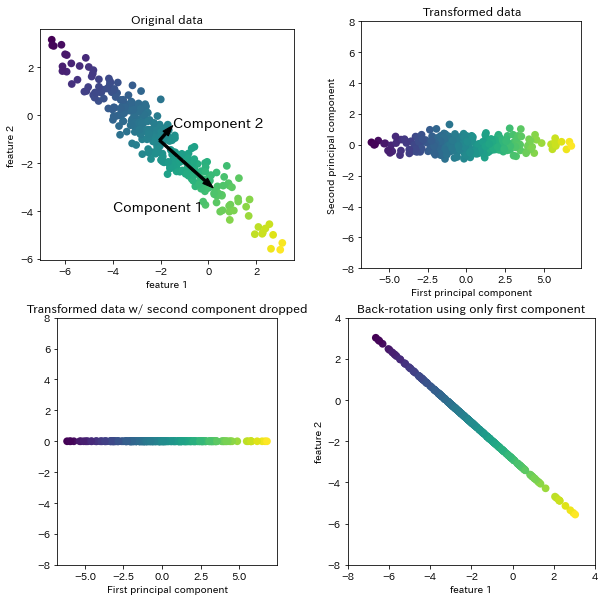

In [26]:
mglearn.plots.plot_pca_illustration()